In [1]:
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib notebook
# %matplotlib inline

# A simple 3D linear system

Remember, linear dynamical systems are characterized by the **additive** relationship between state variables!

As you already know, linear dynamical systems have the generic exponential solution. But just to illustrate, we are going to use a numerical integration method known as the **Euler method**:

<img src="Imgs/euler.png" alt="terms" width="200"/>

In [3]:
def Integrate3D(F,IC,dt=0.001,t_max=5):
    """
    Returns the numerically integrated (euler method) solutions of 3D dX/dt = F(X) for all initial conditions in list IC.
    F must be a R^3-->R^3 vector field of the form dx,dy = F(x,y).
    """
    num_steps = int(t_max/dt)
    Traj = []
    for ic in IC:
        traj = np.ndarray([num_steps,3],dtype=float) #container for solution
        traj[0,:] = np.array(ic)
        for t in range(1,num_steps): #euler integration
            traj[t,:] = traj[t-1,:]+dt*F(traj[t-1,:])
        
        Traj.append(traj)
        
    return Traj


def PlotTrajectory(Traj):
    # Plot trajectories in time
    fig = plt.figure()
    ax = plt.axes()
    
    for traj in Traj:
        ax.plot(traj[:,0], label='x1')
        ax.plot(traj[:,1], label='x2') 
        ax.plot(traj[:,2], label='x3')
    
    plt.legend()
    ax.set_xlabel('time steps')
    ax.set_ylabel('x')
        
    
def PhasePortrait3D(Traj):    
    
    # Plot phase portrait
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    colors=['tab:cyan', 'tab:pink', 'tab:olive']
    for i, traj in enumerate(Traj):
        ax.plot3D(traj[:1,0],traj[:1,1],traj[:1,2],'k.')
        ax.plot3D(traj[:,0], traj[:,1],traj[:,2], c=colors[i], label=f'IC-{i}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    plt.legend()
    

## System equations

We are going to start with a simple linear dynamical system in 3D.


<img src="Imgs/3d_linear.png" alt="terms" width="500"/>

<IPython.core.display.Javascript object>


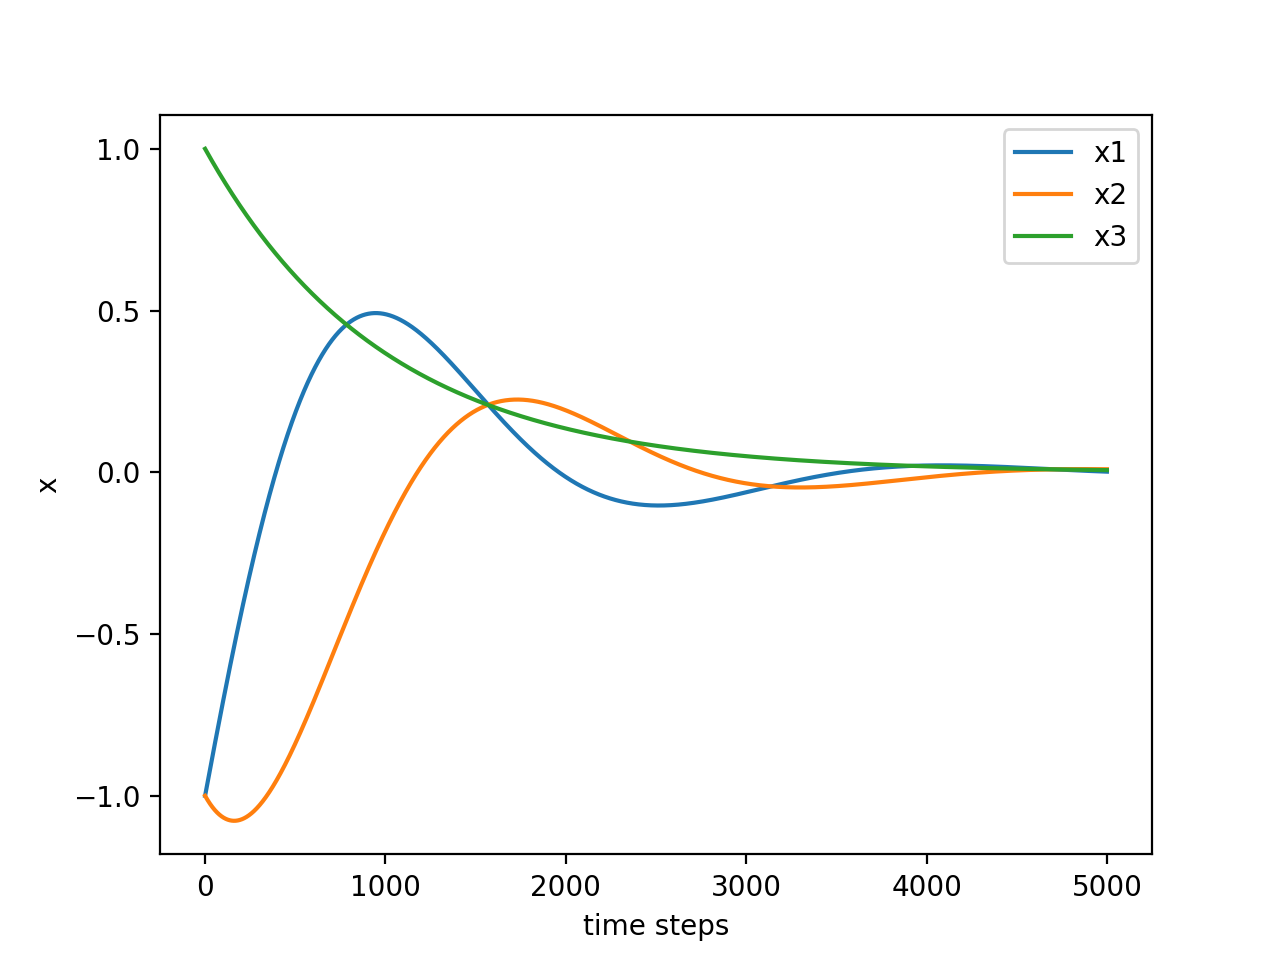

In [4]:
# system params
A = np.array([[-1,-2,0],[2,-1,0],[0,0,-1]])
F = lambda X: np.dot(A,X)

# plot
IC = [[-1,-1,1]]
# IC = [[1, 1, 1]]
# IC = [[1, -1, -1]] 
# IC = [[0,0,0]]

Traj = Integrate3D(F,IC)
PlotTrajectory(Traj)

## The phase portrait

The phase portrait depicts the trajectory of the system parameterized by time. It is very useful to analyze the behavior of the system as a whole. However, it does not work for high-dimensional systems (n>3). 

<IPython.core.display.Javascript object>


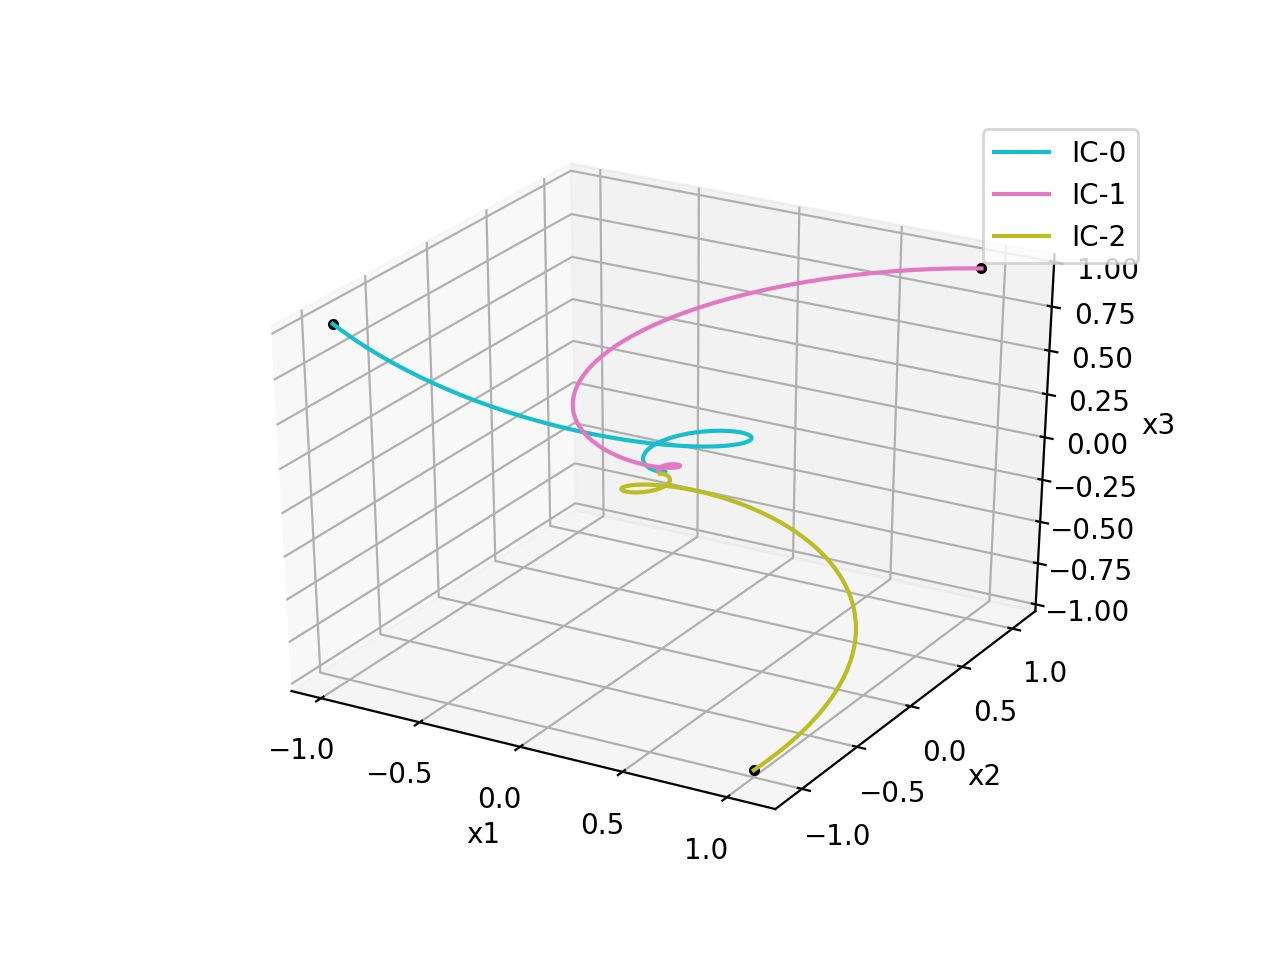

In [5]:
# system params
A = np.array([[-1,-2,0],[2,-1,0],[0,0,-1]])
IC = [[-1,-1,1.],[1.,1.,1.],[1.,-1.,-1.]] 

# phase portrait/diagram
F = lambda X: np.dot(A,X)
Traj = Integrate3D(F,IC)
PhasePortrait3D(Traj)